#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

print("\nWe have now imported those libraries:\n",
      "1. Use pandas for data manipulation\n",
      "2. Use numpy for numerical operations\n",
      "3. Create plots with matplotlib and seaborn for data visualization\n")


We have now imported those libraries:
 1. Use pandas for data manipulation
 2. Use numpy for numerical operations
 3. Create plots with matplotlib and seaborn for data visualization



### Dataset Loading and Preparation.

##### Function to load datasets.

In [2]:
def load_dataset(filepath):
    try:
        return pd.read_excel(filepath)      
    except Exception as e:
        print(f'Error loading dataset from {filepath}: {e}')
        return None

# Load the first dataset (viewership data)
viewership_df = load_dataset('C:\\Users\\Sb199\\Downloads\\netflix cleaned data.xlsx')

# Load the second dataset (movies and shows data)
netflix_df = load_dataset('C:\\Users\\Sb199\\Downloads\\netflix data.xlsx')

##### Display first five row of viewership_df and netflix_df.

In [3]:
viewership_df.head()

show_id  viewership_count viewer_age_group  average_watch_duration  \
0  ts300399            131958      Kids (0-12)                   21.45   
1   tm84618            156867      Kids (0-12)                   28.09   
2  tm127384            141932    Teens (13-19)                   77.72   
3   tm70993            375838    Teens (13-19)                  113.62   
4  tm190788            269178   Adults (36-50)                  106.67   

   watch_completion_rate  viewer_region viewer_gender device_type  
0                  97.69           Asia          Male      Mobile  
1                  61.52  South America          Male     Desktop  
2                  62.65  North America    Non-Binary      Mobile  
3                  96.99           Asia          Male      Tablet  
4                  69.80           Asia        Female     Desktop

In [4]:
netflix_df.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm127384      Monty Python and the Holy Grail  MOVIE   
3   tm70993                        Life of Brian  MOVIE   
4  tm190788                         The Exorcist  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  King Arthur, accompanied by his squire, recrui...          1975   
3  Brian Cohen is an average young Jewish man, bu...          1979   
4  12-year-old Regan MacNeil begins to adapt an e...          1973   

  age_certification  runtime                 genres production_countries  \
0             TV-MA       48      ['documentation']               ['US']   
1                 R      113     ['crime', 'drama']               ['US']   
2                PG       91  ['comedy', 'fantasy']               ['GB']   
3                 R       94             ['comedy']               ['GB']   
4                 R      133             ['horror']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      1.0        NaN         NaN         NaN            0.600         NaN  
1      NaN  tt0075314         8.3    795222.0           27.612         8.2  
2      NaN  tt0071853         8.2    530877.0           18.216         7.8  
3      NaN  tt0079470         8.0    392419.0           17.505         7.8  
4      NaN  tt0070047         8.1    391942.0           95.337         7.7

##### Display Data Information.

In [5]:
viewership_df.info()
netflix_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   show_id                 5806 non-null   object 
 1   viewership_count        5806 non-null   int64  
 2   viewer_age_group        5806 non-null   object 
 3   average_watch_duration  5806 non-null   float64
 4   watch_completion_rate   5806 non-null   float64
 5   viewer_region           5806 non-null   object 
 6   viewer_gender           5806 non-null   object 
 7   device_type             5806 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 363.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null

##### Check Column of Data.

In [6]:
# Check the columns in both datasets
print("\n-----------------------------------------------------------------------------------------")
print("Columns in viewership_df:")
print(viewership_df.columns)

print("Columns in netflix_df:")
print(netflix_df.columns)
print("-----------------------------------------------------------------------------------------\n")


-----------------------------------------------------------------------------------------
Columns in viewership_df:
Index(['show_id', 'viewership_count', 'viewer_age_group',
       'average_watch_duration', 'watch_completion_rate', 'viewer_region',
       'viewer_gender', 'device_type'],
      dtype='object')
Columns in netflix_df:
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
-----------------------------------------------------------------------------------------



##### Rename 'id' column to 'show_id'.

In [7]:
# Rename 'id' column to 'show_id' if necessary
if 'id' in viewership_df.columns:
    viewership_df.rename(columns={'id': 'show_id'}, inplace=True)

if 'id' in netflix_df.columns:
    netflix_df.rename(columns={'id': 'show_id'}, inplace=True)

# Check the columns in both datasets after renaming
print("\n-----------------------------------------------------------------------------------------")
print("Columns in viewership_df:")
print(viewership_df.columns)

print("Columns in netflix_df:")
print(netflix_df.columns)
print("-----------------------------------------------------------------------------------------\n")


-----------------------------------------------------------------------------------------
Columns in viewership_df:
Index(['show_id', 'viewership_count', 'viewer_age_group',
       'average_watch_duration', 'watch_completion_rate', 'viewer_region',
       'viewer_gender', 'device_type'],
      dtype='object')
Columns in netflix_df:
Index(['show_id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
-----------------------------------------------------------------------------------------



##### Check both data is loaded or not and Mearge both datasets if loaded.
##### Convert genres from string and production_countries to list.
##### Filling missing value in numerical column with mean values and create columns with NaN values if they don't exist.
##### Filling missing value in release year column with median values and and assign NaN values if they don't exist.

In [8]:
# Check if both datasets are loaded successfully
if viewership_df is None or netflix_df is None:
    print("One or both datasets failed to load. Please check the file paths and try again.")
else:
    print("\nLoaded viewership data:")
    print(viewership_df.head())
    print("\nLoaded movies and shows data:")
    print(netflix_df.head())

    # Merge datasets on 'show_id'
    data = pd.merge(viewership_df, netflix_df, on='show_id', how='inner')
    print("\nMerged dataset:")
    print(data.head())
    print(data.info()) # Display information about the dataset
    print("-----------------------------------------------------------------------------------------\n")
    
# Clean and preprocess data and fill missing values
# Convert 'genres' from string to list
if 'genres' in data.columns:
    data['genres'] = data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
else:
    data['genres'] = [[] for _ in range(len(data))]  # Create empty lists if 'genres' not present

# Convert 'production_countries' from string to list
if 'production_countries' in data.columns:
    data['production_countries'] = data['production_countries'].apply(
        lambda x: eval(x) if isinstance(x, str) else []
    )
else:
    data['production_countries'] = [[] for _ in range(len(data))]  # Create empty lists if not present

# Fill missing values in numerical columns with mean values and create columns if they don't exist
numerical_cols = [
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
    'average_watch_duration', 'watch_completion_rate', 'runtime', 'seasons', 'viewership_count'
]
for col in numerical_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].mean())
    else:
        data[col] = np.nan  # Create the column with NaN values if it doesn't exist 

# Ensureing 'release_year' is numeric and fill missing values with median
if 'release_year' in data.columns:
    data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
    data['release_year'] = data['release_year'].fillna(data['release_year'].median())
else:
    data['release_year'] = np.nan  # Assign NaN if 'release_year' does not exist


Loaded viewership data:
    show_id  viewership_count viewer_age_group  average_watch_duration  \
0  ts300399            131958      Kids (0-12)                   21.45   
1   tm84618            156867      Kids (0-12)                   28.09   
2  tm127384            141932    Teens (13-19)                   77.72   
3   tm70993            375838    Teens (13-19)                  113.62   
4  tm190788            269178   Adults (36-50)                  106.67   

   watch_completion_rate  viewer_region viewer_gender device_type  
0                  97.69           Asia          Male      Mobile  
1                  61.52  South America          Male     Desktop  
2                  62.65  North America    Non-Binary      Mobile  
3                  96.99           Asia          Male      Tablet  
4                  69.80           Asia        Female     Desktop  

Loaded movies and shows data:
    show_id                                title   type  \
0  ts300399  Five Came Back: The

### Data Visualization

##### 1. Viewership by Age Group and Region(Stacked Bar Chart)
 Visualizing viewership across different age groups and regions allows Netflix to see which demographics are most engaged in different regions. This can inform targeted marketing campaigns and localized content strategies

###### Bar charts, especially stacked bar charts, are useful for comparing quantities across multiple categories. In this case, you want to compare the total viewership count across different age groups and regions. A stacked bar chart is particularly effective here because it allows you to visualize both the overall totals and the contribution of each region within each age group. The 'viridis' colormap helps distinguish between different regions, making the chart both informative and visually appealing.

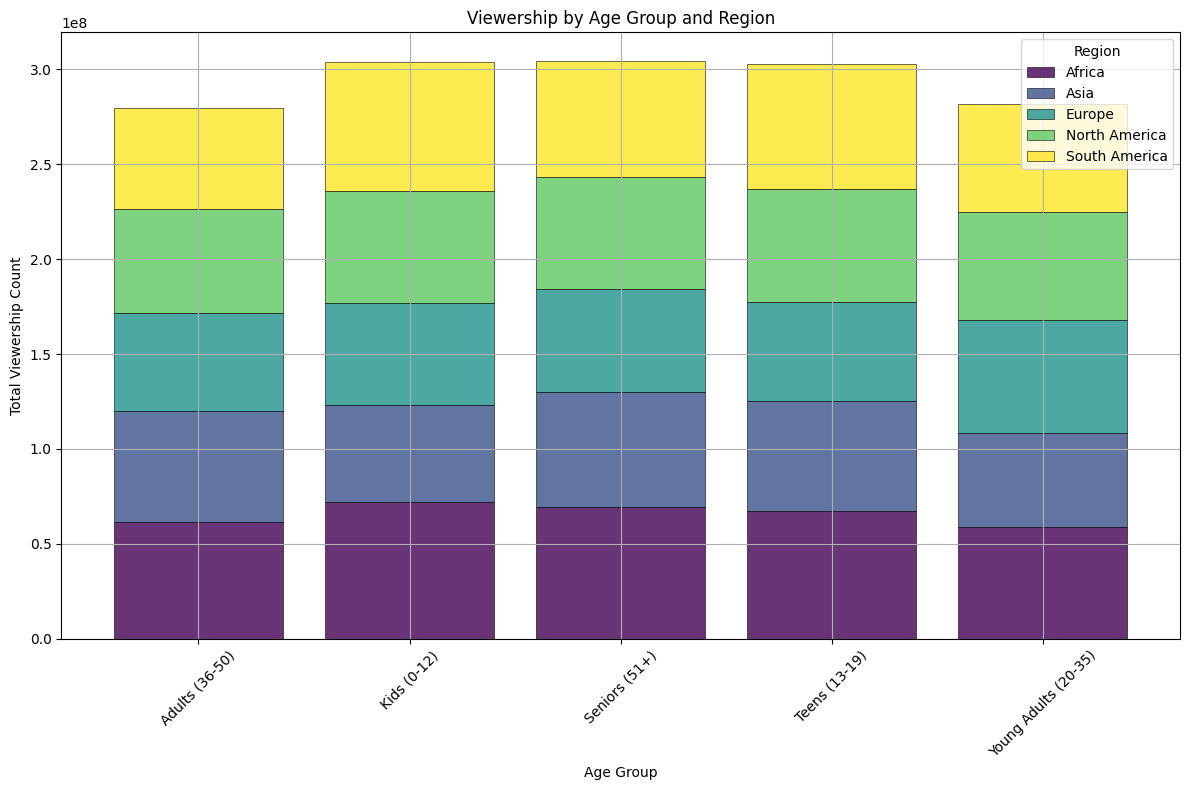

In [9]:
age_region_viewership = data.groupby(['viewer_age_group', 'viewer_region'])['viewership_count'].sum().unstack()

# Plot the data as a stacked bar chart
age_region_viewership.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black',
                           linewidth=0.5, rot=0, width=0.8, alpha=0.8, grid=True)
# add title and labels
plt.title('Viewership by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Total Viewership Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with the title 'Region'
plt.legend(title='Region')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 2. Genre Analysis(Box Plot)
Box Plot of Average Watch Duration by Genre: This provides insights into how long viewers of different genres are willing to watch. Some genres might have longer average watch durations, suggesting higher engagement.

###### This box plot allows you to compare the distribution of average watch durations across different genres, providing insights into how viewership habits might vary by genre. Box plots are particularly useful for visualizing the central tendency and variability of the data, as well as identifying any outliers.

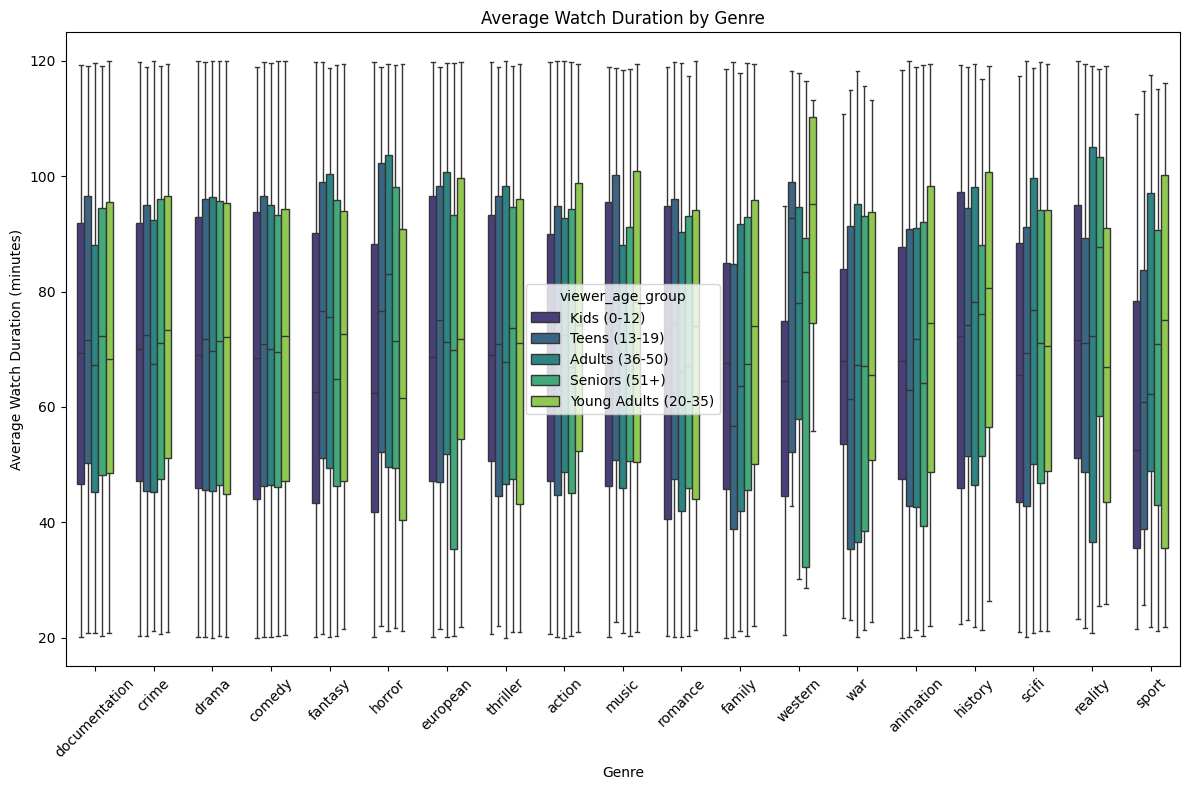

In [10]:
# Use seaborn to create a box plot of 'average_watch_duration' by 'genres'
# Explode genres and reset index to avoid duplicate indices
genres_data = data.explode('genres').reset_index(drop=True)

# Remove entries with missing or empty genres (if any)
genres_data = genres_data[genres_data['genres'].notna() & (genres_data['genres'] != '')]

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='genres', y='average_watch_duration', data=genres_data, linewidth=1, palette='viridis', hue='viewer_age_group',
            fliersize=3, width=0.6, saturation=0.8)

# Add the title and labels
plt.title('Average Watch Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Watch Duration (minutes)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 3. Distribution of Watch Completion Rates(Histogram)
Understanding the distribution of watch completion rates can highlight how often viewers finish watching content. This could identify content that consistently engages viewers to completion versus content that drops off.

###### This histogram will help you understand the distribution of watch completion rates in your data. You can see the frequency of different ranges of completion rates, identify patterns, and detect any outliers.

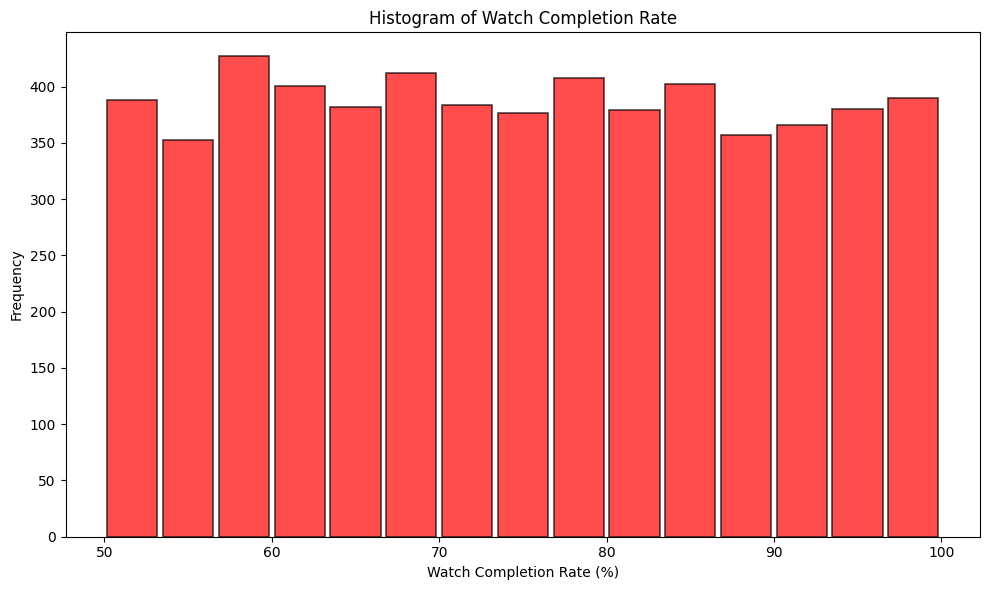

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(data['watch_completion_rate'], bins=15, color='red', edgecolor='black', linewidth=1.2, 
         alpha=0.7, rwidth=0.9)

# Add the title and labels
plt.title('Histogram of Watch Completion Rate')
plt.xlabel('Watch Completion Rate (%)')
plt.ylabel('Frequency')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 4. Relationship between Runtime and Viewership Count(Scatter Plot)
By plotting runtime against viewership count, Netflix can determine if there's an optimal content length that maximizes viewership.

###### Scatter plots are useful for visualizing the relationship between two continuous variables. In this case, the scatter plot allows you to see how viewership_count varies with runtime. This can help identify trends, patterns, and potential correlations between the two variables. If you see a pattern or clustering of points, it might suggest a relationship between the runtime of content and its viewership count. Scatter plots also make it easy to spot any outliers or unusual data points.

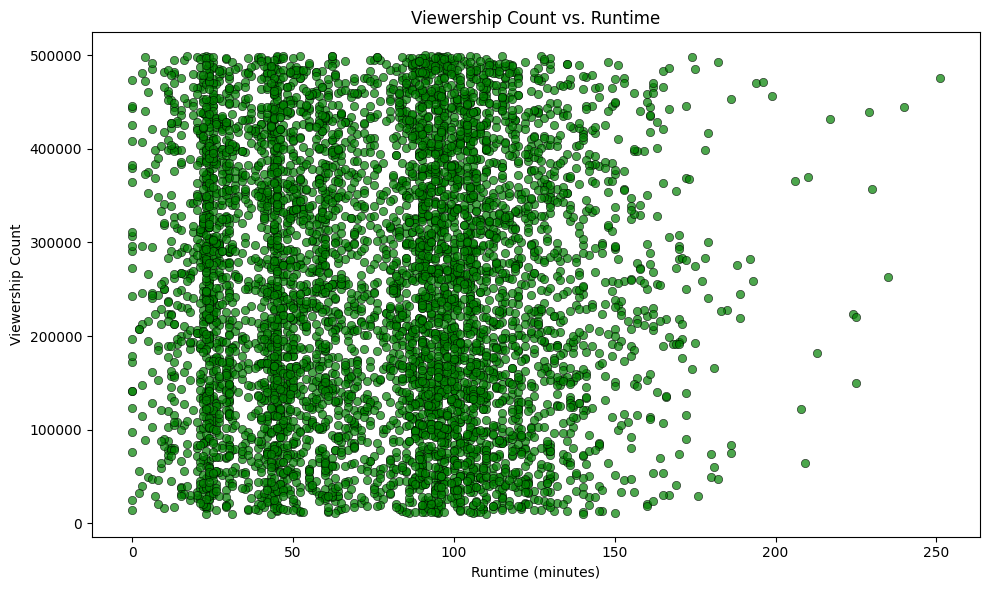

In [12]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(data['runtime'], data['viewership_count'], c='green', alpha=0.7, edgecolors='black', linewidth=0.5)

# Add the title and labels
plt.title('Viewership Count vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Viewership Count')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 5. IMDB Score Distribution by Content Type(Violin Plot)
The violin plot showcases the distribution of IMDB scores across different content types (e.g., movies, TV shows). This visualization is highly useful for understanding the variability and central tendency of IMDB scores within each content type. The wider sections of the violin plot indicate higher density of scores, and the plot's shape can reveal multiple modes or peaks in the distribution. Netflix can leverage this insight to assess the quality perception of different content types and make decisions on content curation and creation.

###### Violin plots are useful for visualizing the distribution of numerical data and comparing different categories. They combine the features of box plots and density plots, showing the distribution shape and providing insights into the data's central tendency and variability. In this case, the violin plot allows you to compare the distribution of IMDB scores across different content types, revealing patterns and differences that may not be apparent from other plot types.

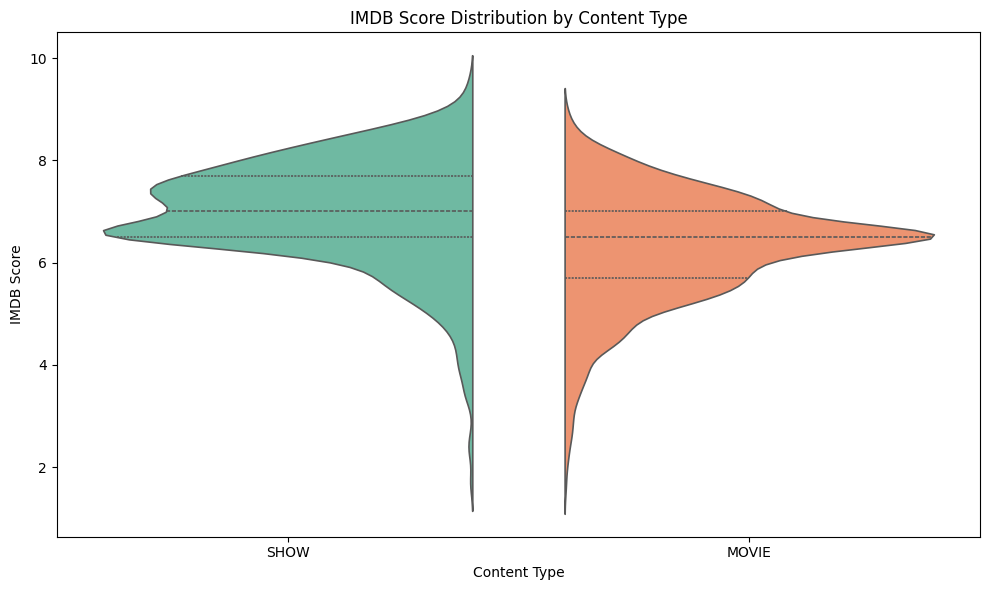

In [ ]:
# Use seaborn to create a violin plot of 'imdb_score' by 'type'
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(x='type', y='imdb_score', data=data, hue='type', palette='Set2', legend=False, linewidth=1.2,
               split=True, saturation=0.8, inner='quartile')

# Add the title and labels
plt.title('IMDB Score Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('IMDB Score')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline

# Show the plot
plt.show()

##### 6. Device Type Usage(Pie Chart)
Pie Chart of Viewership by device type by nowing which devices are predominantly used can help in optimizing content delivery and user interface design for the most popular devices.

###### Pie charts are useful for visualizing the proportions of a whole. In this case, the pie chart allows you to see how viewership is distributed across different device types. Each slice of the pie represents the proportion of total viewership that each device type contributes, making it easy to compare and understand the distribution. The percentages displayed on the chart provide a clear understanding of the relative size of each category. However, it's important to note that pie charts are most effective when there are a limited number of categories, as too many slices can make the chart difficult to read.

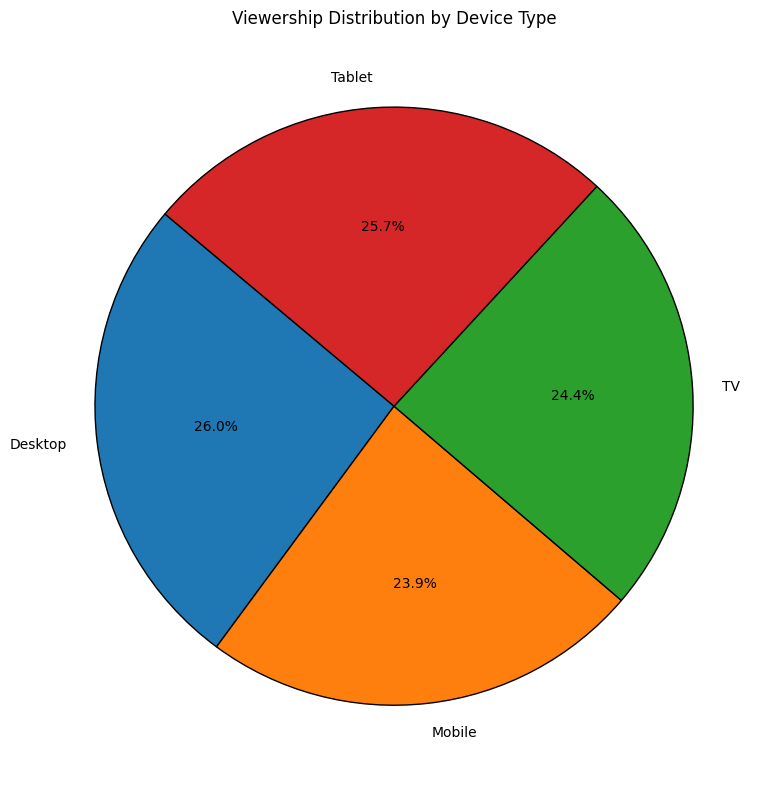

In [14]:
# Group the data by 'device_type' and sum the 'viewership_count'
device_viewership = data.groupby('device_type')['viewership_count'].sum()

# Plot the data as a pie chart
device_viewership.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, wedgeprops={'edgecolor': 'black'})

# Add the title and labels
plt.title('Viewership Distribution by Device Type')
plt.ylabel('')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 7. Correlation Analysis(Heatmap)
Understanding the correlations between various numerical variables helps Netflix identify which factors are most closely related. Strong correlations can guide decisions on what metrics to focus on for improving viewer experience.

###### Heatmaps are useful for visualizing the correlation between multiple variables. They provide an immediate visual summary of the relationships between all pairs of variables in your dataset. This can help you quickly identify strong positive or negative correlations, which may inform your analysis or decision-making process. The color gradient helps you see at a glance which variables are most closely related and to what degree.

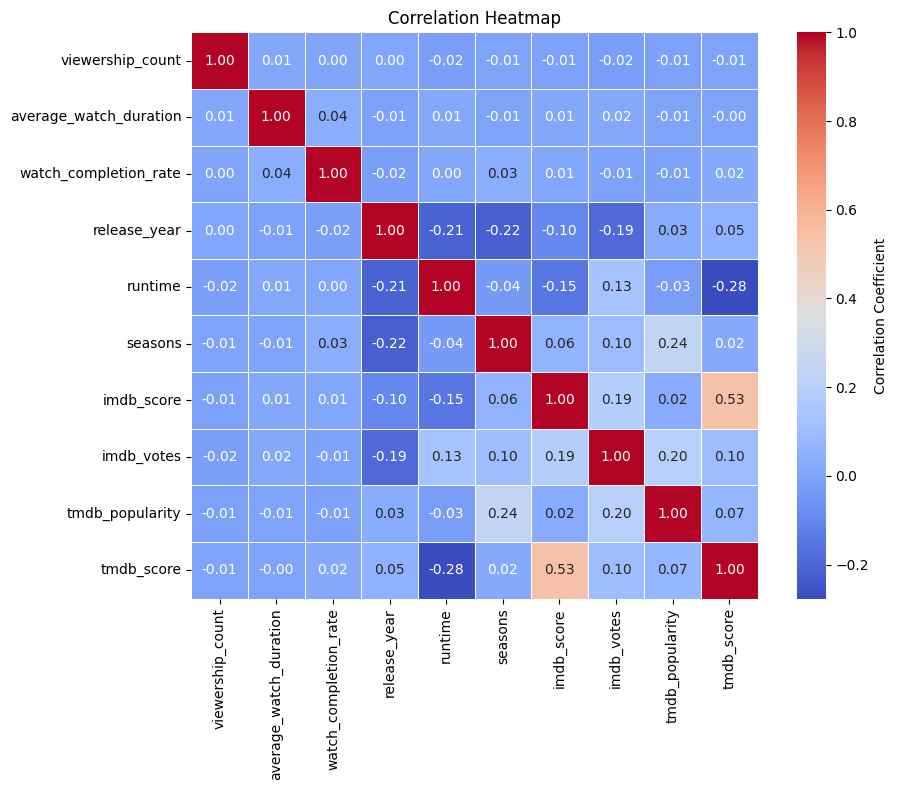

In [15]:
# Use seaborn to create a heatmap of the correlation matrix
# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, square=True)

# Add the title
plt.title('Correlation Heatmap')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 8. Content Release Trends:(Histogram)
Histogram of Release Years helps Netflix to analyze the trends in content release over the years, showing periods of high or low content addition.

###### Histograms are useful for visualizing the distribution of a single variable. In this case, the histogram allows you to see how many titles were released in each year. This can help identify trends over time, such as periods of increased or decreased activity in content releases. By examining the shape of the distribution, you can gain insights into how the release of titles has evolved over the years.

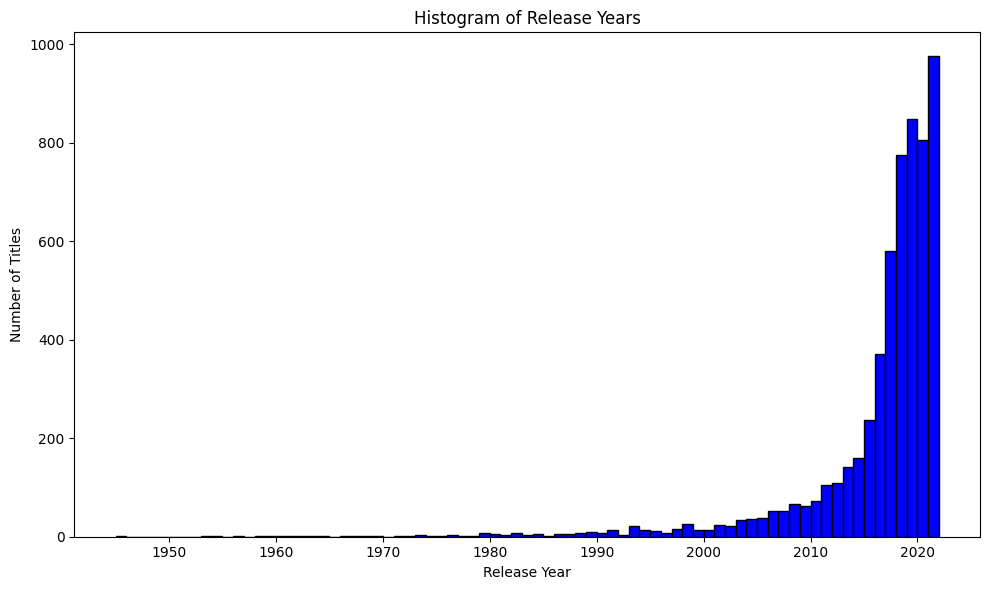

In [16]:
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(data['release_year'], bins=range(int(data['release_year'].min()), int(data['release_year'].max())+1), color='blue', 
         edgecolor='black')

# Add the title and labels
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 9. Viewership Over Time(Line Plot)
Tracking viewership count over release years provides insights into how content popularity evolves over time and can help in identifying trends and shifts in viewer preferences.

###### Line plots are useful for visualizing trends over time. In this case, the line plot allows you to see how the total viewership count has changed over the release years. By connecting the data points, you can easily identify patterns, trends, and fluctuations in viewership. Line plots are particularly effective for time series data, where the goal is to observe how a variable evolves over a period of time.

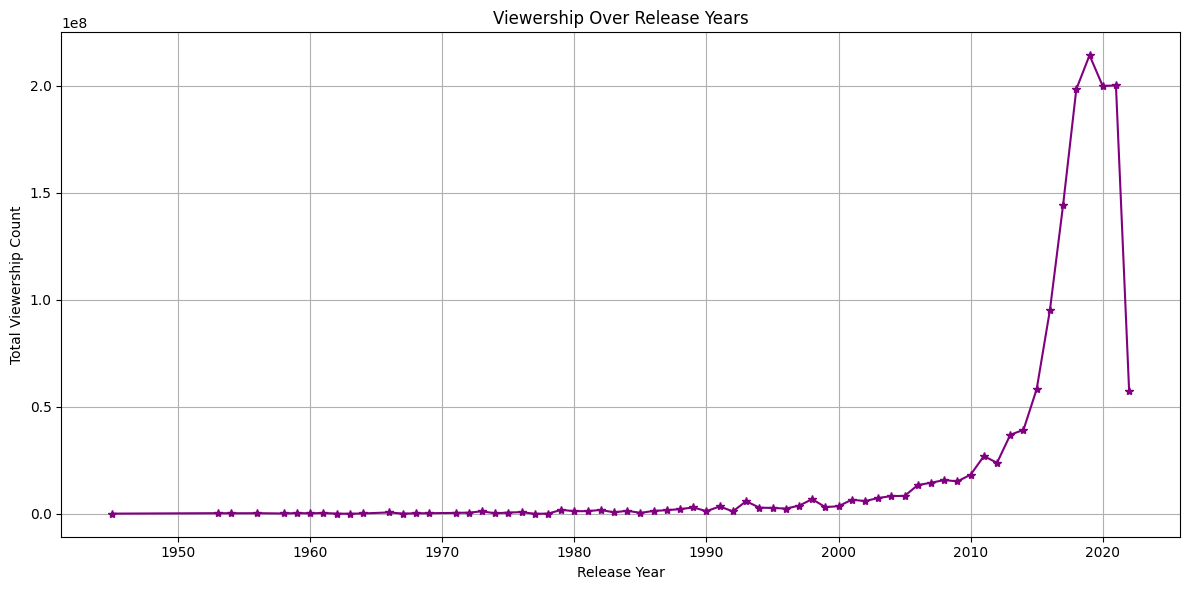

In [17]:
# Group the data by 'release_year' and sum the 'viewership_count'
viewership_by_year = data.groupby('release_year')['viewership_count'].sum()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line plot
plt.plot(viewership_by_year.index, viewership_by_year.values, marker='*', linestyle='-', color='purple')

# Add the title and labels
plt.title('Viewership Over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Total Viewership Count')

# Add gridlines for better readability
plt.grid(True)

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 10. Runtime Distribution by Content Type(Box Plot)
This visualization highlights the differences in runtime across various content types, which could be useful for understanding how different formats (e.g., movies, series) engage audiences.

###### Box plots are useful for visualizing the distribution of numerical data and comparing different categories. In this case, the box plot allows you to compare the distribution of runtimes across different content types, revealing patterns and differences that may not be apparent from other plot types. Box plots show the median, interquartile range, and potential outliers, providing a comprehensive view of the data distribution

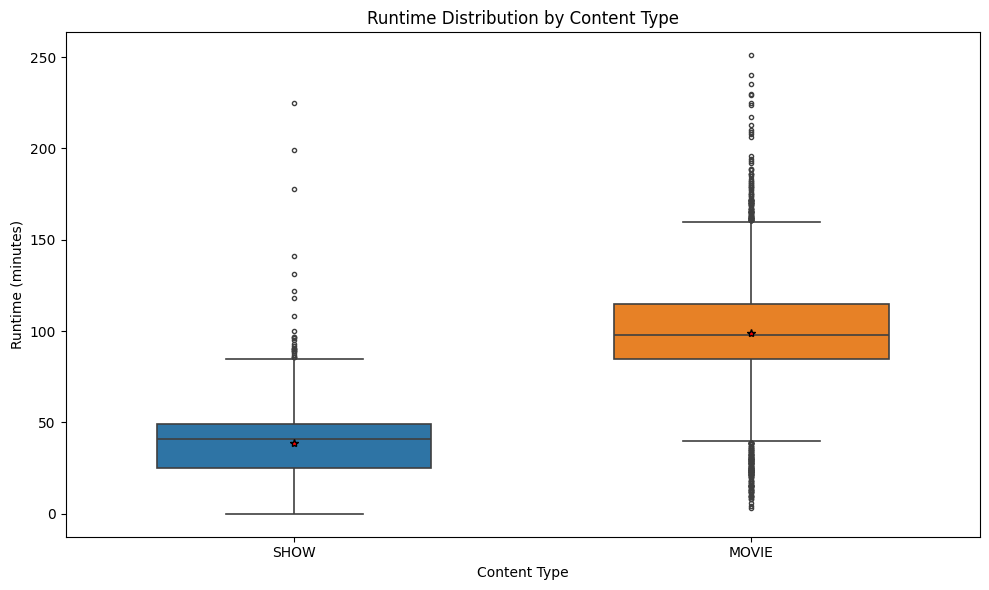

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='type', y='runtime', data=data,hue='type', linewidth=1.2, saturation=0.8, width=0.6, fliersize=3,
            showmeans=True, meanprops={'marker':'*', 'markerfacecolor':'red', 'markeredgecolor':'black'})

# Add the title and labels
plt.title('Runtime Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Runtime (minutes)')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 11. IMDB vs. TMDB Scores(Scatter Plot)
Scatter plot with regression line is comparing IMDB and TMDB scores allows Netflix to see if there's a correlation between these two rating platforms, which might be indicative of content quality perception.

###### Scatter plots with regression lines are useful for visualizing the relationship between two continuous variables and assessing the strength and direction of their correlation. In this case, the scatter plot allows you to see how TMDB scores vary with IMDB scores. The regression line provides a visual representation of the linear relationship between the two variables. If the points are closely clustered around the regression line, it indicates a strong linear relationship. The scatter plot also helps in identifying any outliers or unusual data points.

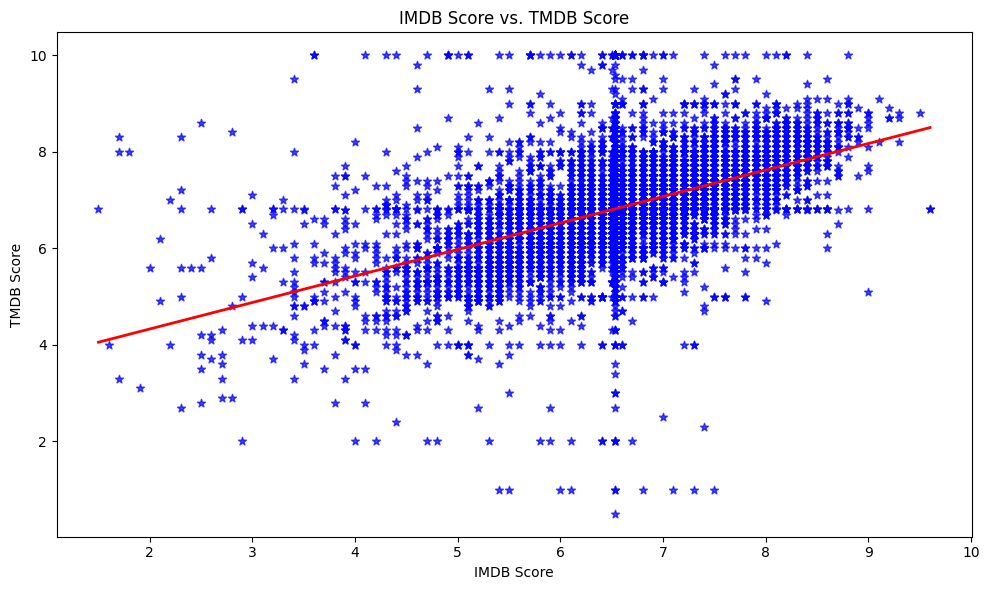

In [19]:
# Use Seaborn to create a scatter plot with a regression line
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='imdb_score', y='tmdb_score', data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red', 'linewidth':2},
            ci=None, marker='*', color='blue')

# Add the title and labels
plt.title('IMDB Score vs. TMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 12. Completion Rate by Gender(Bar Plot)
Bar plot of average watch completion rate by gender, this visualization helps Netflix understand how different genders engage with the content. A higher completion rate for a particular gender might indicate a stronger engagement or preference for certain types of shows or movies.

###### Bar plots are useful for comparing the average values of different categories. In this case, the bar plot allows you to compare the average watch completion rates across different genders. The height of each bar represents the mean completion rate for each gender, making it easy to compare the values visually. This can help identify patterns and differences in viewing behavior based on gender.

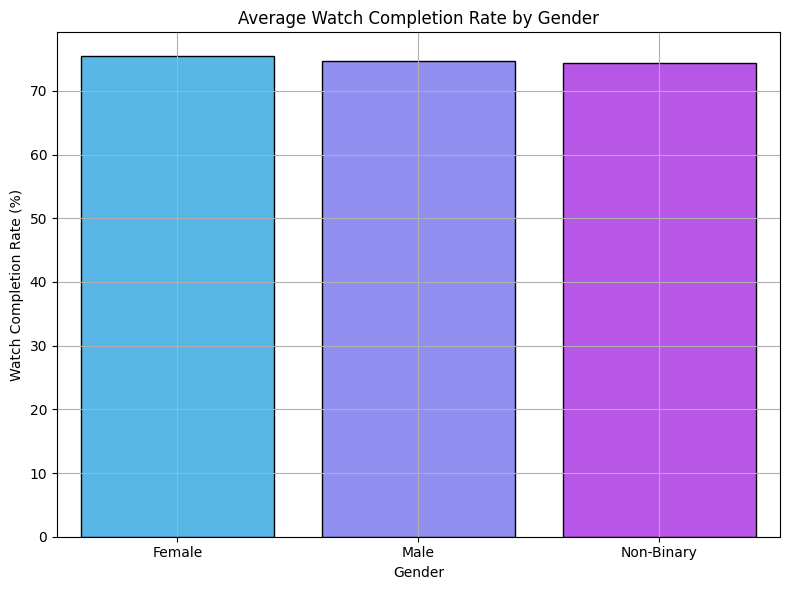

In [20]:
# Use seaborn to create a bar plot of 'average_watch_duration' by 'viewer_age_group'
# Group the data by 'viewer_gender' and calculate the mean 'watch_completion_rate'
completion_by_gender = data.groupby('viewer_gender')['watch_completion_rate'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x='viewer_gender', y='watch_completion_rate', data=completion_by_gender, edgecolor='black', legend=False, palette='cool', hue='viewer_gender')

# Add the title and labels
plt.title('Average Watch Completion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Watch Completion Rate (%)')

# Add grid lines
plt.grid(True)

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 13. Average Watch Duration vs. Viewership Count(Quiver Plot)
The quiver plot visualizes the relationship between average_watch_duration and viewership_count, with vectors indicating the direction and magnitude of change. This plot helps identify areas where significant changes occur. For instance, longer vectors might suggest rapid changes in viewership count relative to watch duration. Netflix can use this information to understand user engagement patterns and optimize content length for maximum viewer retention.

###### Quiver plots are useful for visualizing vector fields, where each vector represents the rate of change of a variable in both the x and y directions. In this case, the quiver plot allows you to see how the average_watch_duration and viewership_count change with respect to each other. The vectors show the direction and magnitude of the changes, providing insights into the relationships and patterns in your data.

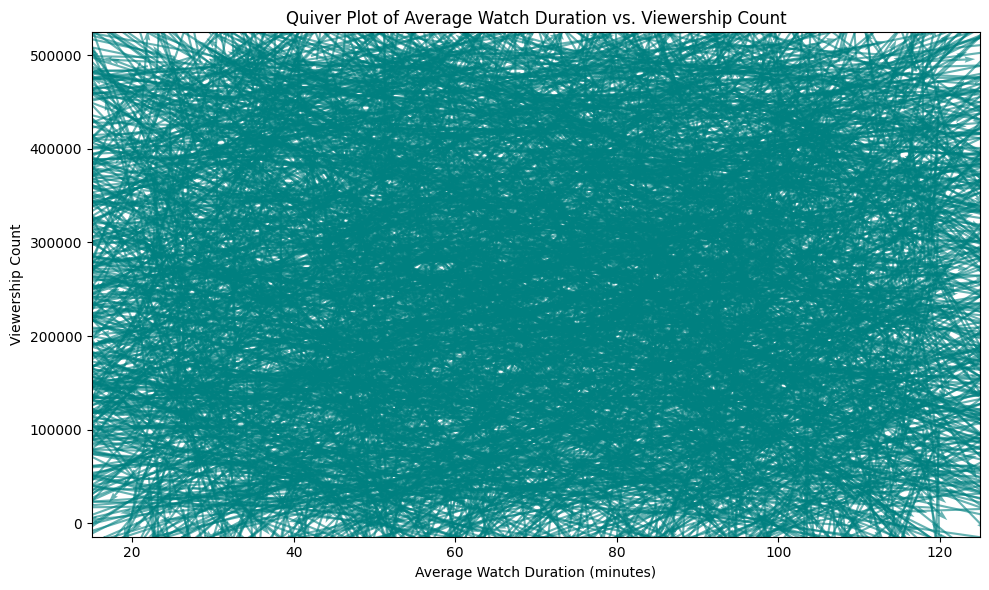

In [21]:
# Extract the average watch duration and viewership count
X = data['average_watch_duration']
Y = data['viewership_count']

# Calculate the gradients
U = np.gradient(X)
V = np.gradient(Y)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the quiver plot
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='teal', alpha=0.6)

# Add the title and labels
plt.title('Quiver Plot of Average Watch Duration vs. Viewership Count')
plt.xlabel('Average Watch Duration (minutes)')
plt.ylabel('Viewership Count')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 14. Stream Plot
This visualization can be insightful for understanding the flow of viewership trends and the relationship between various watch metrics.

###### Stream plots are useful for visualizing vector fields, where the direction and magnitude of vectors represent the flow or rate of change of variables in both the x and y directions. In this case, the stream plot provides a visual representation of how average_watch_duration and watch_completion_rate change with respect to each other. The streamlines show the direction and intensity of the changes, helping to identify patterns and relationships in the data.

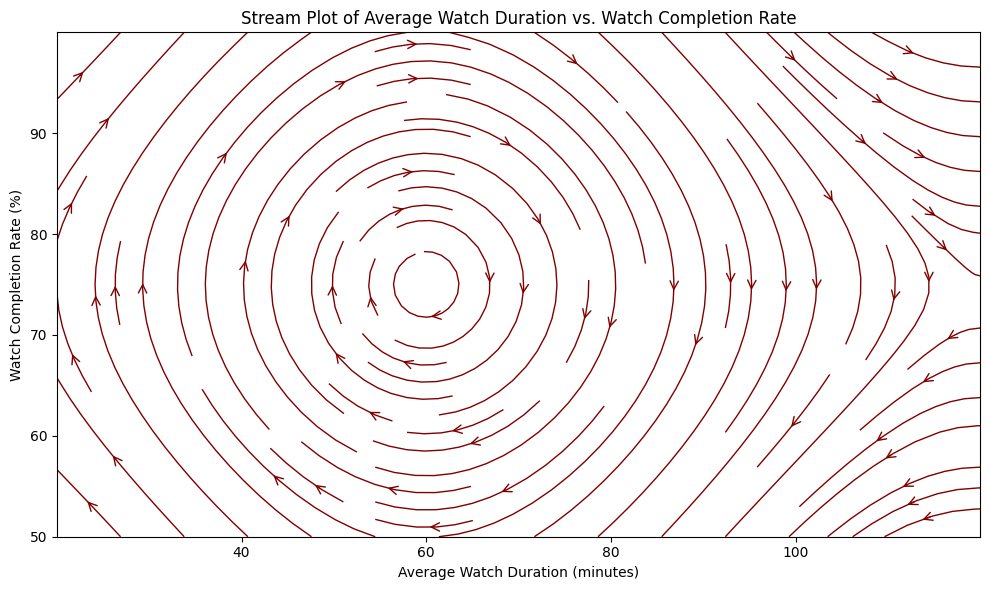

In [22]:
# Remove NaN values and duplicates
data_clean = data[['average_watch_duration', 'watch_completion_rate']].dropna().drop_duplicates()

# Determine the number of points for the grid
num_points = 100  # You can adjust this number as needed

# Create equally spaced x and y arrays
x = np.linspace(
    data_clean['average_watch_duration'].min(),
    data_clean['average_watch_duration'].max(),
    num=num_points
)
y = np.linspace(
    data_clean['watch_completion_rate'].min(),
    data_clean['watch_completion_rate'].max(),
    num=num_points
)

# Ensure that x and y are strictly increasing and equally spaced
if len(x) < 2 or len(y) < 2:
    print("Not enough unique data points to create a streamplot.")
else:
    # Create meshgrid
    X, Y = np.meshgrid(x, y)

    # Define U and V (artificial vector field for visualization)
    # For demonstration, we'll create a vector field that isn't directly based on the data
    U = np.cos(Y / np.max(Y) * 2 * np.pi)
    V = np.sin(X / np.max(X) * 2 * np.pi)

    plt.figure(figsize=(10, 6))
    plt.streamplot(
        x, y, U, V, density=1.0, linewidth=1, arrowsize=1.5,
        arrowstyle='->', color='maroon'
    )
    plt.title('Stream Plot of Average Watch Duration vs. Watch Completion Rate')
    plt.xlabel('Average Watch Duration (minutes)')
    plt.ylabel('Watch Completion Rate (%)')
    plt.tight_layout()
    plt.show()

##### 15. 3D Scatter Plot
This plot adds another dimension to the analysis, allowing Netflix to visualize the interplay between runtime, viewership count, and IMDB score, giving a more holistic view of content performance.

###### A 3D scatter plot is useful for visualizing the relationship between three continuous variables. In this case, the plot allows you to see how runtime, viewership_count, and IMDB score interact with each other. By using color to represent the IMDB score, you can easily identify patterns and trends in the data. 3D scatter plots are particularly effective when you want to explore the multi-dimensional relationships in your dataset and gain insights that may not be apparent from 2D plots.

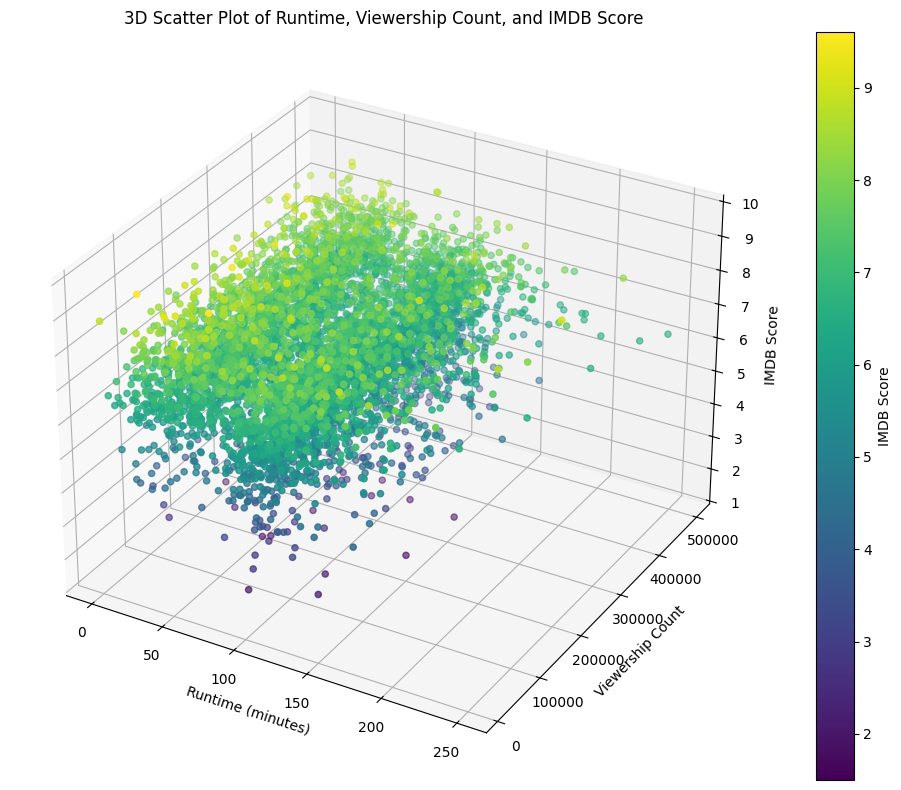

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the figure size
fig = plt.figure(figsize=(12, 8))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Extract the data for the plot
xs = data['runtime']
ys = data['viewership_count']
zs = data['imdb_score']

# Create the scatter plot
sc = ax.scatter(xs, ys, zs, c=data['imdb_score'], cmap='viridis', depthshade=True)

# Add the title and labels
ax.set_title('3D Scatter Plot of Runtime, Viewership Count, and IMDB Score')
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Viewership Count')
ax.set_zlabel('IMDB Score')

# Add a color bar to show the IMDB score
fig.colorbar(sc, ax=ax, label='IMDB Score')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 16. Pairwise Relationships Between Numerical Variables(Pair Plot)
The pair plot provides a matrix of scatter plots for each pair of numerical variables and the distribution of each variable on the diagonal. This comprehensive visualization helps Netflix identify correlations and patterns between variables such as viewership_count, average_watch_duration, watch_completion_rate, runtime, imdb_score, and tmdb_score. High correlations between variables can suggest key factors driving viewership and engagement. For example, a strong correlation between runtime and viewership_count might indicate that longer content tends to attract more viewers.

###### Pair plots are useful for visualizing the pairwise relationships between multiple variables in a dataset. They provide a matrix of plots that show scatter plots for each pair of variables and the distribution of each variable on the diagonal. This allows you to quickly identify patterns, correlations, and potential outliers. By using KDE plots on the diagonal, you can also see the distribution of each variable more clearly

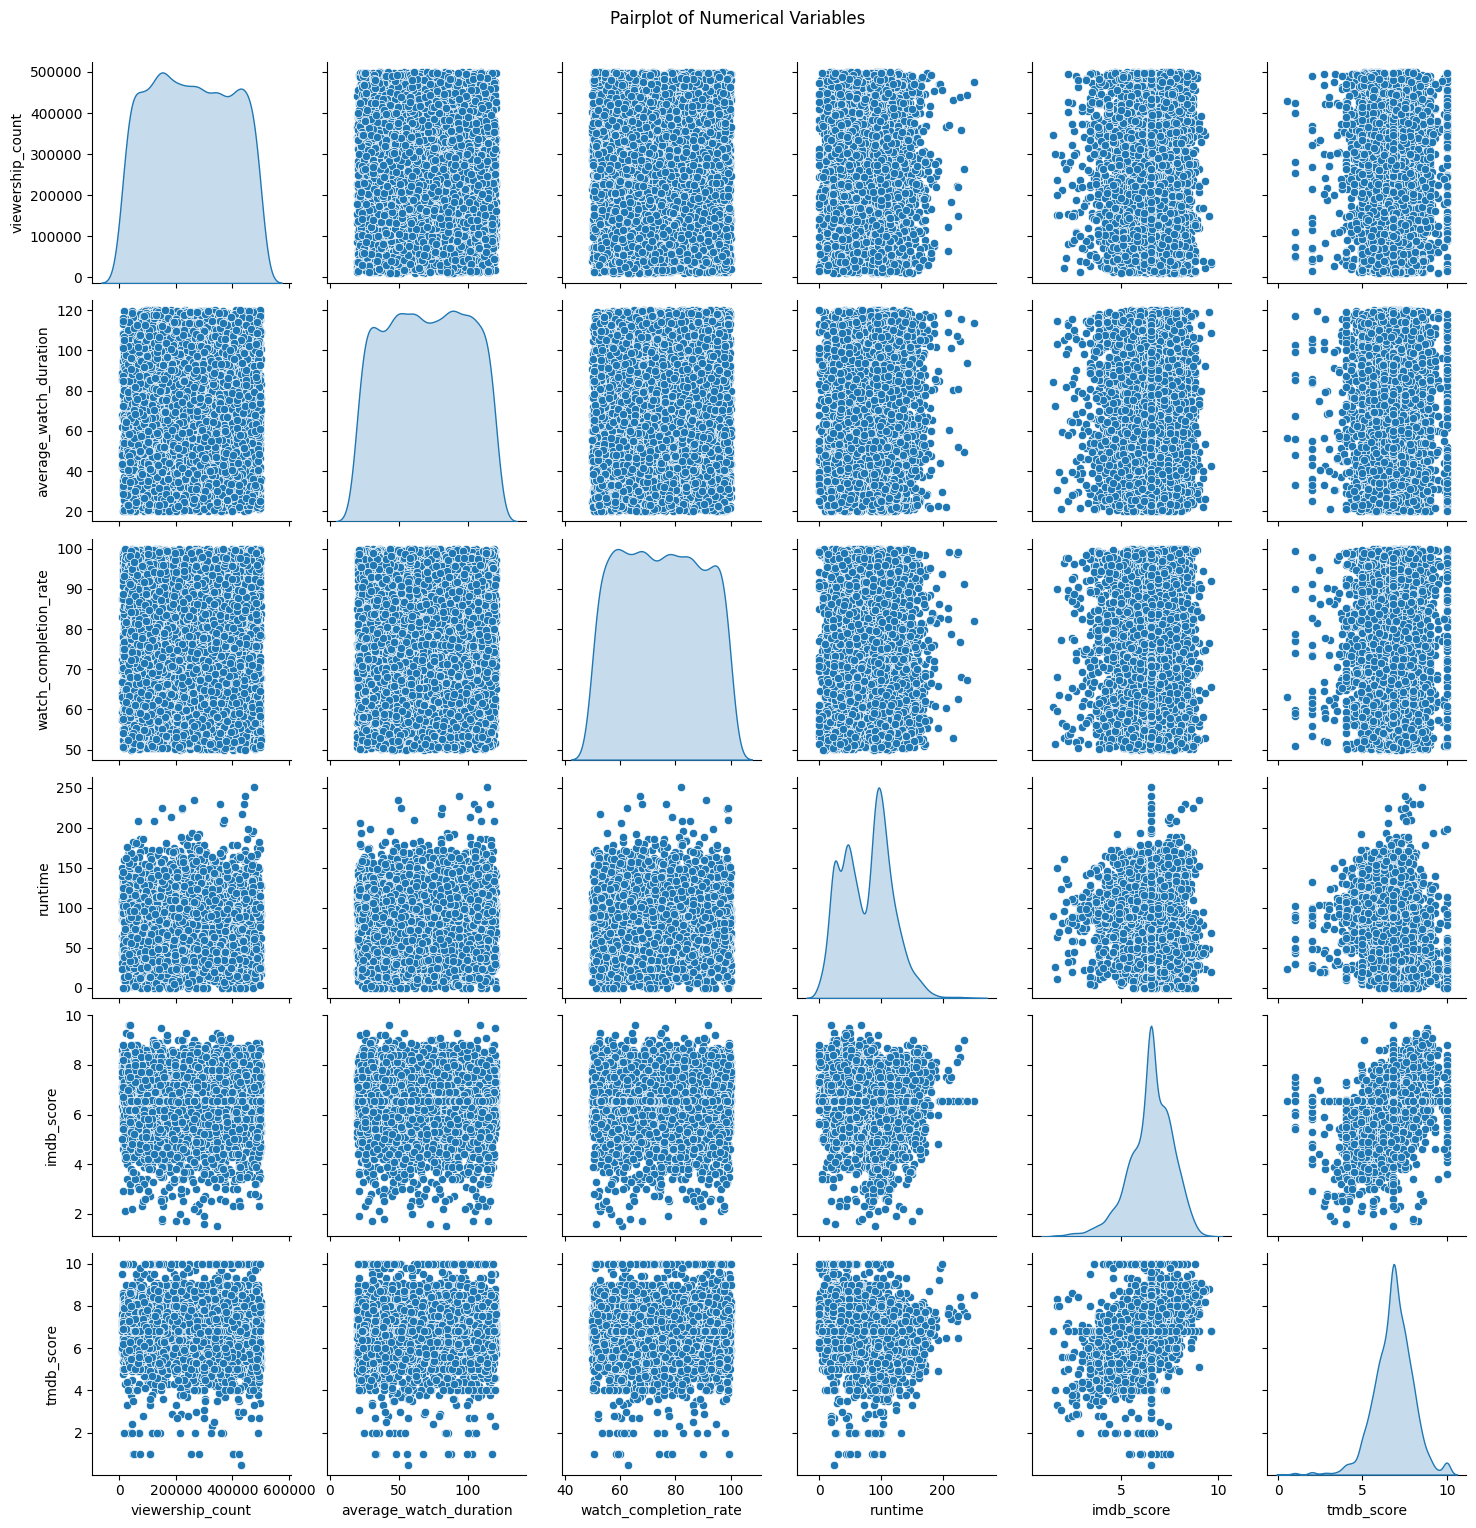

In [24]:
# Use seaborn to create a pairplot of numerical variables
# # Select the numerical columns
numerical_cols = ['viewership_count', 'average_watch_duration', 'watch_completion_rate', 'runtime', 'imdb_score', 'tmdb_score']

# Create the pairplot
sns.pairplot(data[numerical_cols], diag_kind='kde')

# Add a super title
plt.suptitle('Pairplot of Numerical Variables', y=1.02)

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### 17. Watch Duration vs. Completion Rate(Contour Plot)
By visualizing these two metrics together, Netflix can identify areas where content might need to be optimized either for longer engagement or higher completion rates.

###### Contour plots are useful for visualizing three-dimensional data in two dimensions. They show the level curves of a variable, which represent lines of equal value. In this case, the contour plot allows you to see how viewership_count (represented by the contour levels) varies with average_watch_duration and watch_completion_rate. By examining the contour lines, you can identify patterns, relationships, and regions of high or low viewership count. Contour plots are particularly effective for exploring the interactions between three continuous variables and gaining insights that may not be apparent from other types of plots.

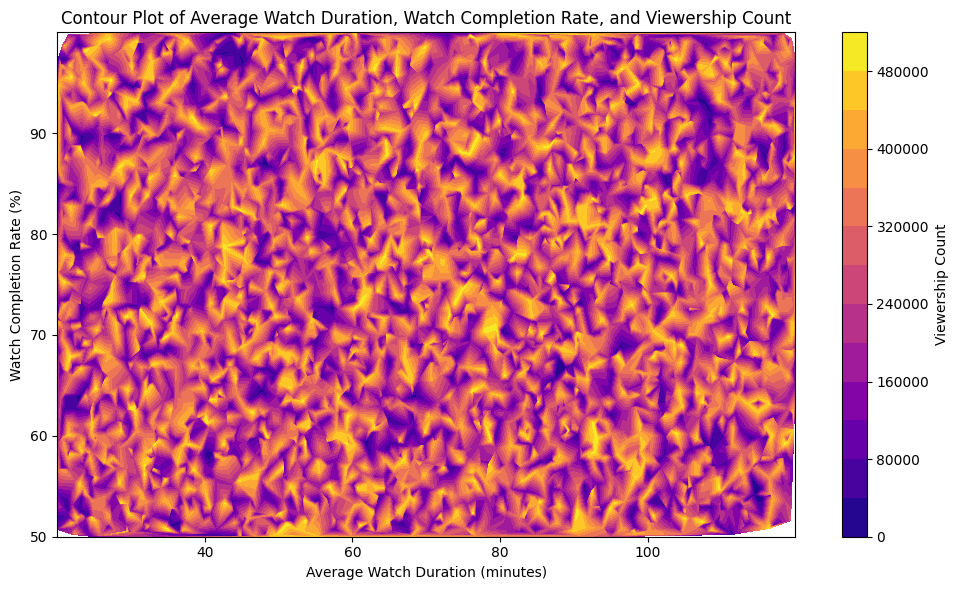

In [25]:
# Extract the relevant data
X = data['average_watch_duration']
Y = data['watch_completion_rate']
Z = data['viewership_count']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the contour plot
plt.tricontourf(X, Y, Z, levels=14, cmap='plasma')

# Add the title and labels
plt.title('Contour Plot of Average Watch Duration, Watch Completion Rate, and Viewership Count')
plt.xlabel('Average Watch Duration (minutes)')
plt.ylabel('Watch Completion Rate (%)')

# Add a color bar to show the viewership count
plt.colorbar(label='Viewership Count')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Display the plot in a Jupyter Notebook
%matplotlib inline
plt.show()

##### Overall Conclusion 
The visualizations provide a multi-faceted view of Netflix's content performance and viewer engagement. They offer valuable insights into demographic preferences, content quality perceptions, optimal content lengths, device usage, and temporal trends in viewership. By leveraging these visual insights, Netflix can make more informed decisions to tailor their content strategy, improve user experience, and ultimately drive higher engagement and satisfaction among their subscribers.